In [87]:
import pandas as pd

# Assuming this function needs to be defined:
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9

class PotatoGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def potato_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 7 if self.celsius else 44.6)
            max_temp = min(row[self.max_temp_column], 30 if self.celsius else 86)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 7 if self.celsius else 44.6
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data


In [94]:
data = pd.read_csv("combined_data NOAA Becker.csv")
data

,time,lat,lon,tmax,tmin,prcp,tavg
0,1/1/1951,45.354168,-93.854164,0.703125,-15.453125,0.000000,-7.382812
1,1/2/1951,45.354168,-93.854164,-10.750000,-20.710938,0.000000,-15.726562
2,1/3/1951,45.354168,-93.854164,-10.867188,-23.187500,0.000000,-17.031250
3,1/4/1951,45.354168,-93.854164,-7.453125,-17.898438,1.781250,-12.671875
4,1/5/1951,45.354168,-93.854164,-11.593750,-22.601562,1.429688,-17.093750
...,...,...,...,...,...,...,...
27024,12/27/2024,45.354168,-93.854164,1.703125,-0.281250,0.742188,0.710938
27025,12/28/2024,45.354168,-93.854164,3.453125,0.570312,3.601562,2.007812
27026,12/29/2024,45.354168,-93.854164,7.390625,-1.492188,0.000000,2.953125
27027,12/30/2024,45.354168,-93.854164,2.468750,-1.179688,0.000000,0.648438


In [95]:
import pandas as pd

# Assuming 'data' DataFrame is already loaded with the necessary columns
# and the PotatoGDD class is already defined as before

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Iterate over each year from 1951 to 2023
for year in range(1951, 2025):
    # Instantiate the CornGDD class for the year
    potato_gdd_instance = PotatoGDD(data, 'time', 'tmin', 'tmax')

    # Define the start and end dates for the year
    start_date = pd.to_datetime(f"{year}-01-01").date()
    end_date = pd.to_datetime(f"{year}-12-31").date()

    # Calculate the GDD for the year
    gdd_results = potato_gdd_instance.potato_gdd(start_date, end_date)

    # Convert GDD and Cumulative_GDD from Celsius to Fahrenheit
    gdd_results['GDD'] = gdd_results['GDD'].apply(celsius_to_fahrenheit)
    gdd_results['Cumulative_GDD'] = gdd_results['Cumulative_GDD'].apply(celsius_to_fahrenheit)

    # Print only the relevant columns (Time, GDD, and Cumulative_GDD)
    print(f"GDD Results for {year} (in Fahrenheit):\n", gdd_results[['time', 'GDD', 'Cumulative_GDD']], "\n")


GDD Results for 1951 (in Fahrenheit):
           time   GDD  Cumulative_GDD
0   1951-01-01  32.0       32.000000
1   1951-01-02  32.0       32.000000
2   1951-01-03  32.0       32.000000
3   1951-01-04  32.0       32.000000
4   1951-01-05  32.0       32.000000
..         ...   ...             ...
360 1951-12-27  32.0     3135.178906
361 1951-12-28  32.0     3135.178906
362 1951-12-29  32.0     3135.178906
363 1951-12-30  32.0     3135.178906
364 1951-12-31  32.0     3135.178906

[365 rows x 3 columns] 

GDD Results for 1952 (in Fahrenheit):
           time   GDD  Cumulative_GDD
365 1952-01-01  32.0       32.000000
366 1952-01-02  32.0       32.000000
367 1952-01-03  32.0       32.000000
368 1952-01-04  32.0       32.000000
369 1952-01-05  32.0       32.000000
..         ...   ...             ...
726 1952-12-27  32.0     3649.810156
727 1952-12-28  32.0     3649.810156
728 1952-12-29  32.0     3649.810156
729 1952-12-30  32.0     3649.810156
730 1952-12-31  32.0     3649.810156

[366 ro

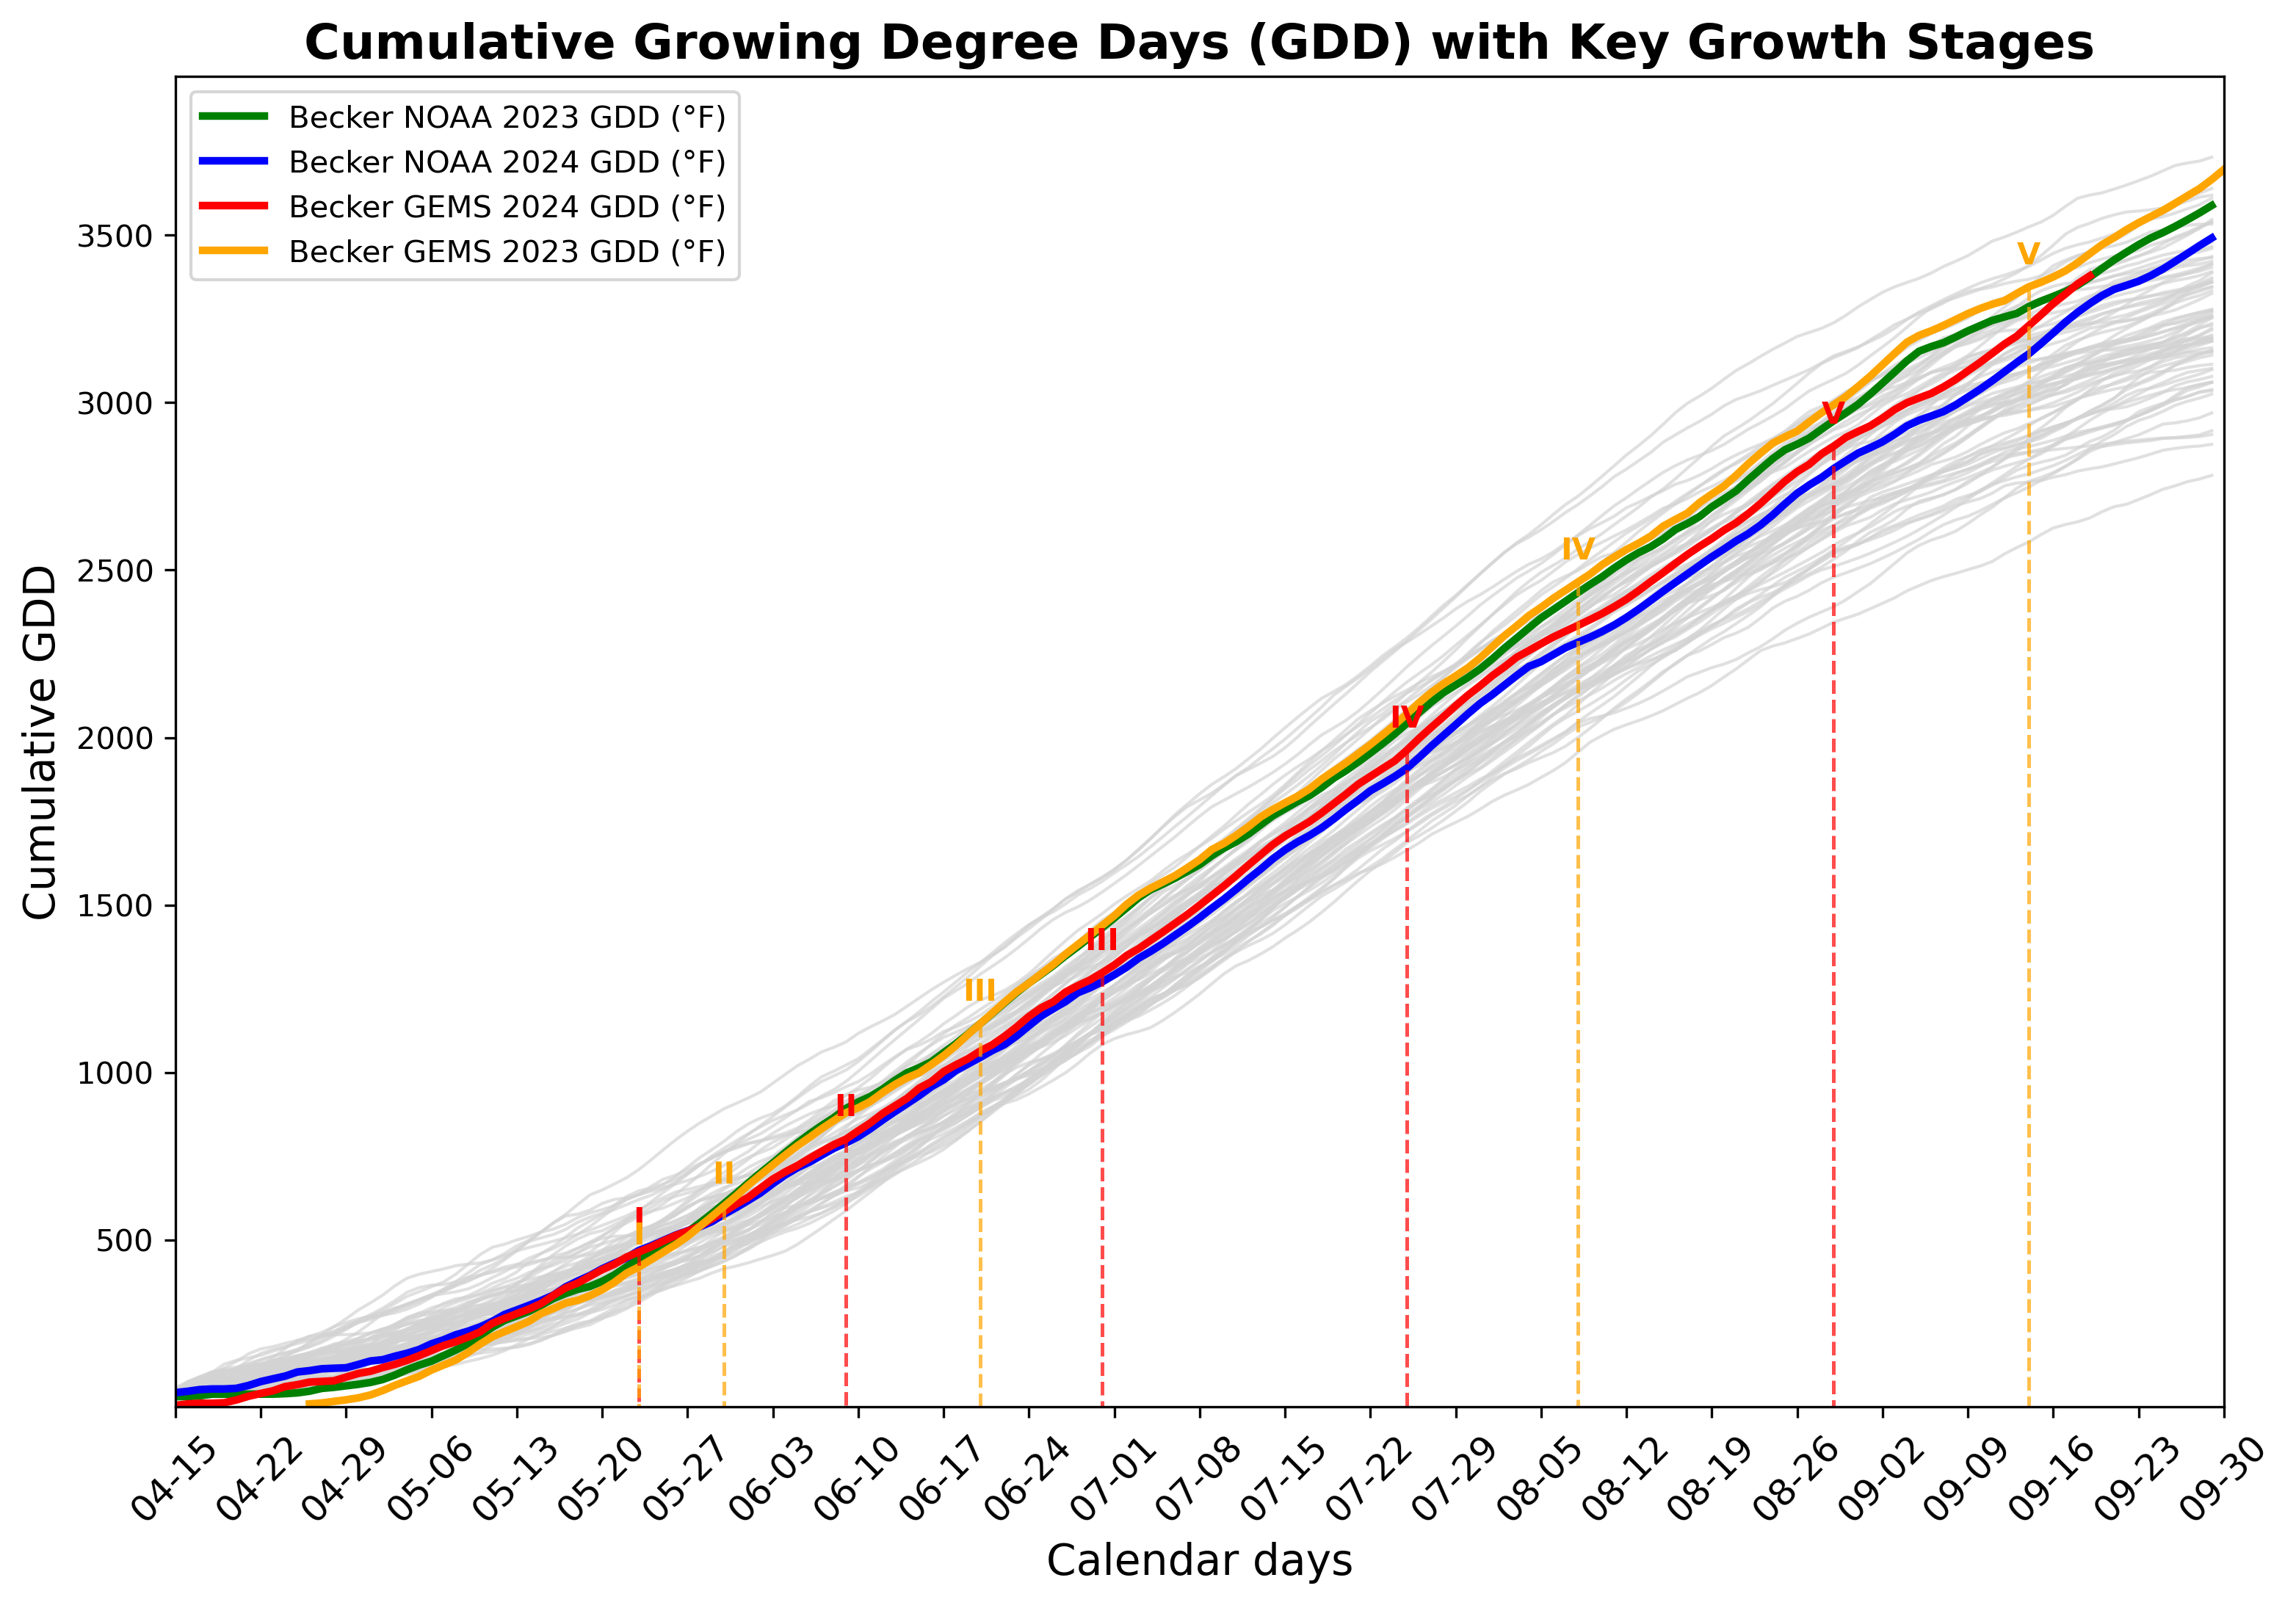

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Becker 2024 & 2023 Data
file_path_2024 = "potato_gdd_BeckerGEMS2024.csv"
file_path_2023 = "potato_gdd_BeckerGEMS2023.csv"
becker_data_2024 = pd.read_csv(file_path_2024, parse_dates=['datetime'])
becker_data_2023 = pd.read_csv(file_path_2023, parse_dates=['datetime'])

# Load Growth Staging Data 2024 & 2023
growth_staging_2024 = pd.read_csv('Becker 2024 Potato growth stage GEMS.csv')
growth_staging_2023 = pd.read_csv('Becker 2023 Potato growth stage GEMS.csv')

# Clean Column Names
growth_staging_2024.rename(columns=lambda x: x.strip(), inplace=True)
growth_staging_2023.rename(columns=lambda x: x.strip(), inplace=True)

# Convert Dates
growth_staging_2024['Date'] = pd.to_datetime(growth_staging_2024['Date'] + '-2024', format='%d-%b-%Y', errors='coerce')
growth_staging_2023['Date'] = pd.to_datetime(growth_staging_2023['Date'] + '-2023', format='%d-%b-%Y', errors='coerce')

# Get Mode Growth Stage for Each Date
growth_staging_mode_2024 = growth_staging_2024.groupby('Date')['Growth Stage'].agg(lambda x: x.mode()[0]).reset_index()
growth_staging_mode_2023 = growth_staging_2023.groupby('Date')['Growth Stage'].agg(lambda x: x.mode()[0]).reset_index()

# Merge Growth Staging Data
becker_data_2024 = pd.merge(becker_data_2024, growth_staging_mode_2024, left_on='datetime', right_on='Date', how='left')
becker_data_2023 = pd.merge(becker_data_2023, growth_staging_mode_2023, left_on='datetime', right_on='Date', how='left')

# Function to Convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Initialize Figure
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=300)

# Define X-Axis Labels (Manual Month-Day Labels)
manual_dates = pd.date_range("2024-04-15", "2024-09-30").strftime('%m-%d').tolist()

# Plot Historical NOAA GDD (1951-2022) and NOAA 2023 & 2024
for year in range(1951, 2025):
    if year in [2000, 2016]:  # Skip specific years
        continue

    try:
        # Simulating data retrieval from a function (replace with actual data)
        potato_gdd_instance = PotatoGDD(data, 'time', 'tmin', 'tmax')  # Assuming you have this function
        gdd_results = potato_gdd_instance.potato_gdd(pd.to_datetime(f"{year}-04-16").date(),
                                                pd.to_datetime(f"{year}-09-30").date())

        # Convert only historical GDD to Fahrenheit
        gdd_results['Cumulative_GDD'] = gdd_results['Cumulative_GDD'].apply(celsius_to_fahrenheit)
        gdd_results['Month_Day'] = gdd_results['time'].dt.strftime('%m-%d')

        # Highlight 2024 in Blue
        if year == 2024:
            ax1.plot(gdd_results['Month_Day'], gdd_results['Cumulative_GDD'], 
                     color='blue', linewidth=2.5, linestyle='solid', label="Becker NOAA 2024 GDD (°F)")

        # Highlight 2023 in Green
        elif year == 2023:
            ax1.plot(gdd_results['Month_Day'], gdd_results['Cumulative_GDD'], 
                     color='green', linewidth=2.5, linestyle='solid', label="Becker NOAA 2023 GDD (°F)")

        # Other years in Light Gray
        else:
            ax1.plot(gdd_results['Month_Day'], gdd_results['Cumulative_GDD'], 
                     color='lightgray', alpha=0.7, linewidth=1)

    except:
        continue

# Overlay Becker 2024 & 2023 Data
becker_data_2024['Month_Day'] = becker_data_2024['datetime'].dt.strftime('%m-%d')
becker_data_2023['Month_Day'] = becker_data_2023['datetime'].dt.strftime('%m-%d')

# Plot Becker GEMS 2024 GDD (Red Solid Line)
ax1.plot(Becker_data_2024['Month_Day'], Becker_data_2024['Cumulative_GDD'], 
         color='red', linewidth=2.5, linestyle='solid', label='Becker GEMS 2024 GDD (°F)')

# Plot Becker GEMS 2023 GDD (Orange Solid Line)
ax1.plot(becker_data_2023['Month_Day'],becker_data_2023['Cumulative_GDD'], 
         color='orange', linewidth=2.5, linestyle='solid', label='Becker GEMS 2023 GDD (°F)')

# Annotate Key Growth Stages for 2024
for i, row in becker_data_2024.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['Planted','I', 'II', 'III','IV','V']:
        ax1.plot([row['Month_Day'], row['Month_Day']], [row['Cumulative_GDD'], 0], 
                 color='red', linestyle='--', linewidth=1.2, alpha=0.7)
        
        ax1.text(row['Month_Day'], row['Cumulative_GDD'] + 50, row['Growth Stage'], 
                 fontsize=10, ha='center', va='bottom', color='red', fontweight='bold')

# Annotate Key Growth Stages for 2023
for i, row in becker_data_2023.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['Planted','I', 'II', 'III','IV','V']:
        ax1.plot([row['Month_Day'], row['Month_Day']], [row['Cumulative_GDD'], 0], 
                 color='orange', linestyle='--', linewidth=1.2, alpha=0.7)
        
        ax1.text(row['Month_Day'], row['Cumulative_GDD'] + 50, row['Growth Stage'], 
                 fontsize=10, ha='center', va='bottom', color='orange', fontweight='bold')

# Customize X-Axis
ax1.set_xticks(range(0, len(manual_dates), 7))
ax1.set_xticklabels(manual_dates[::7], rotation=45, fontsize=12)

# Customize Axes
ax1.set_xlabel('Calendar days', fontsize=14)
ax1.set_ylabel('Cumulative GDD', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set limits
ax1.set_xlim(0, len(manual_dates) - 1)
ax1.set_ylim(bottom=1)

# Add Legends & Title
ax1.legend(loc="upper left")
plt.title('Cumulative Growing Degree Days (GDD) with Key Growth Stages', fontsize=16, weight='bold')

# Show Plot
plt.show()



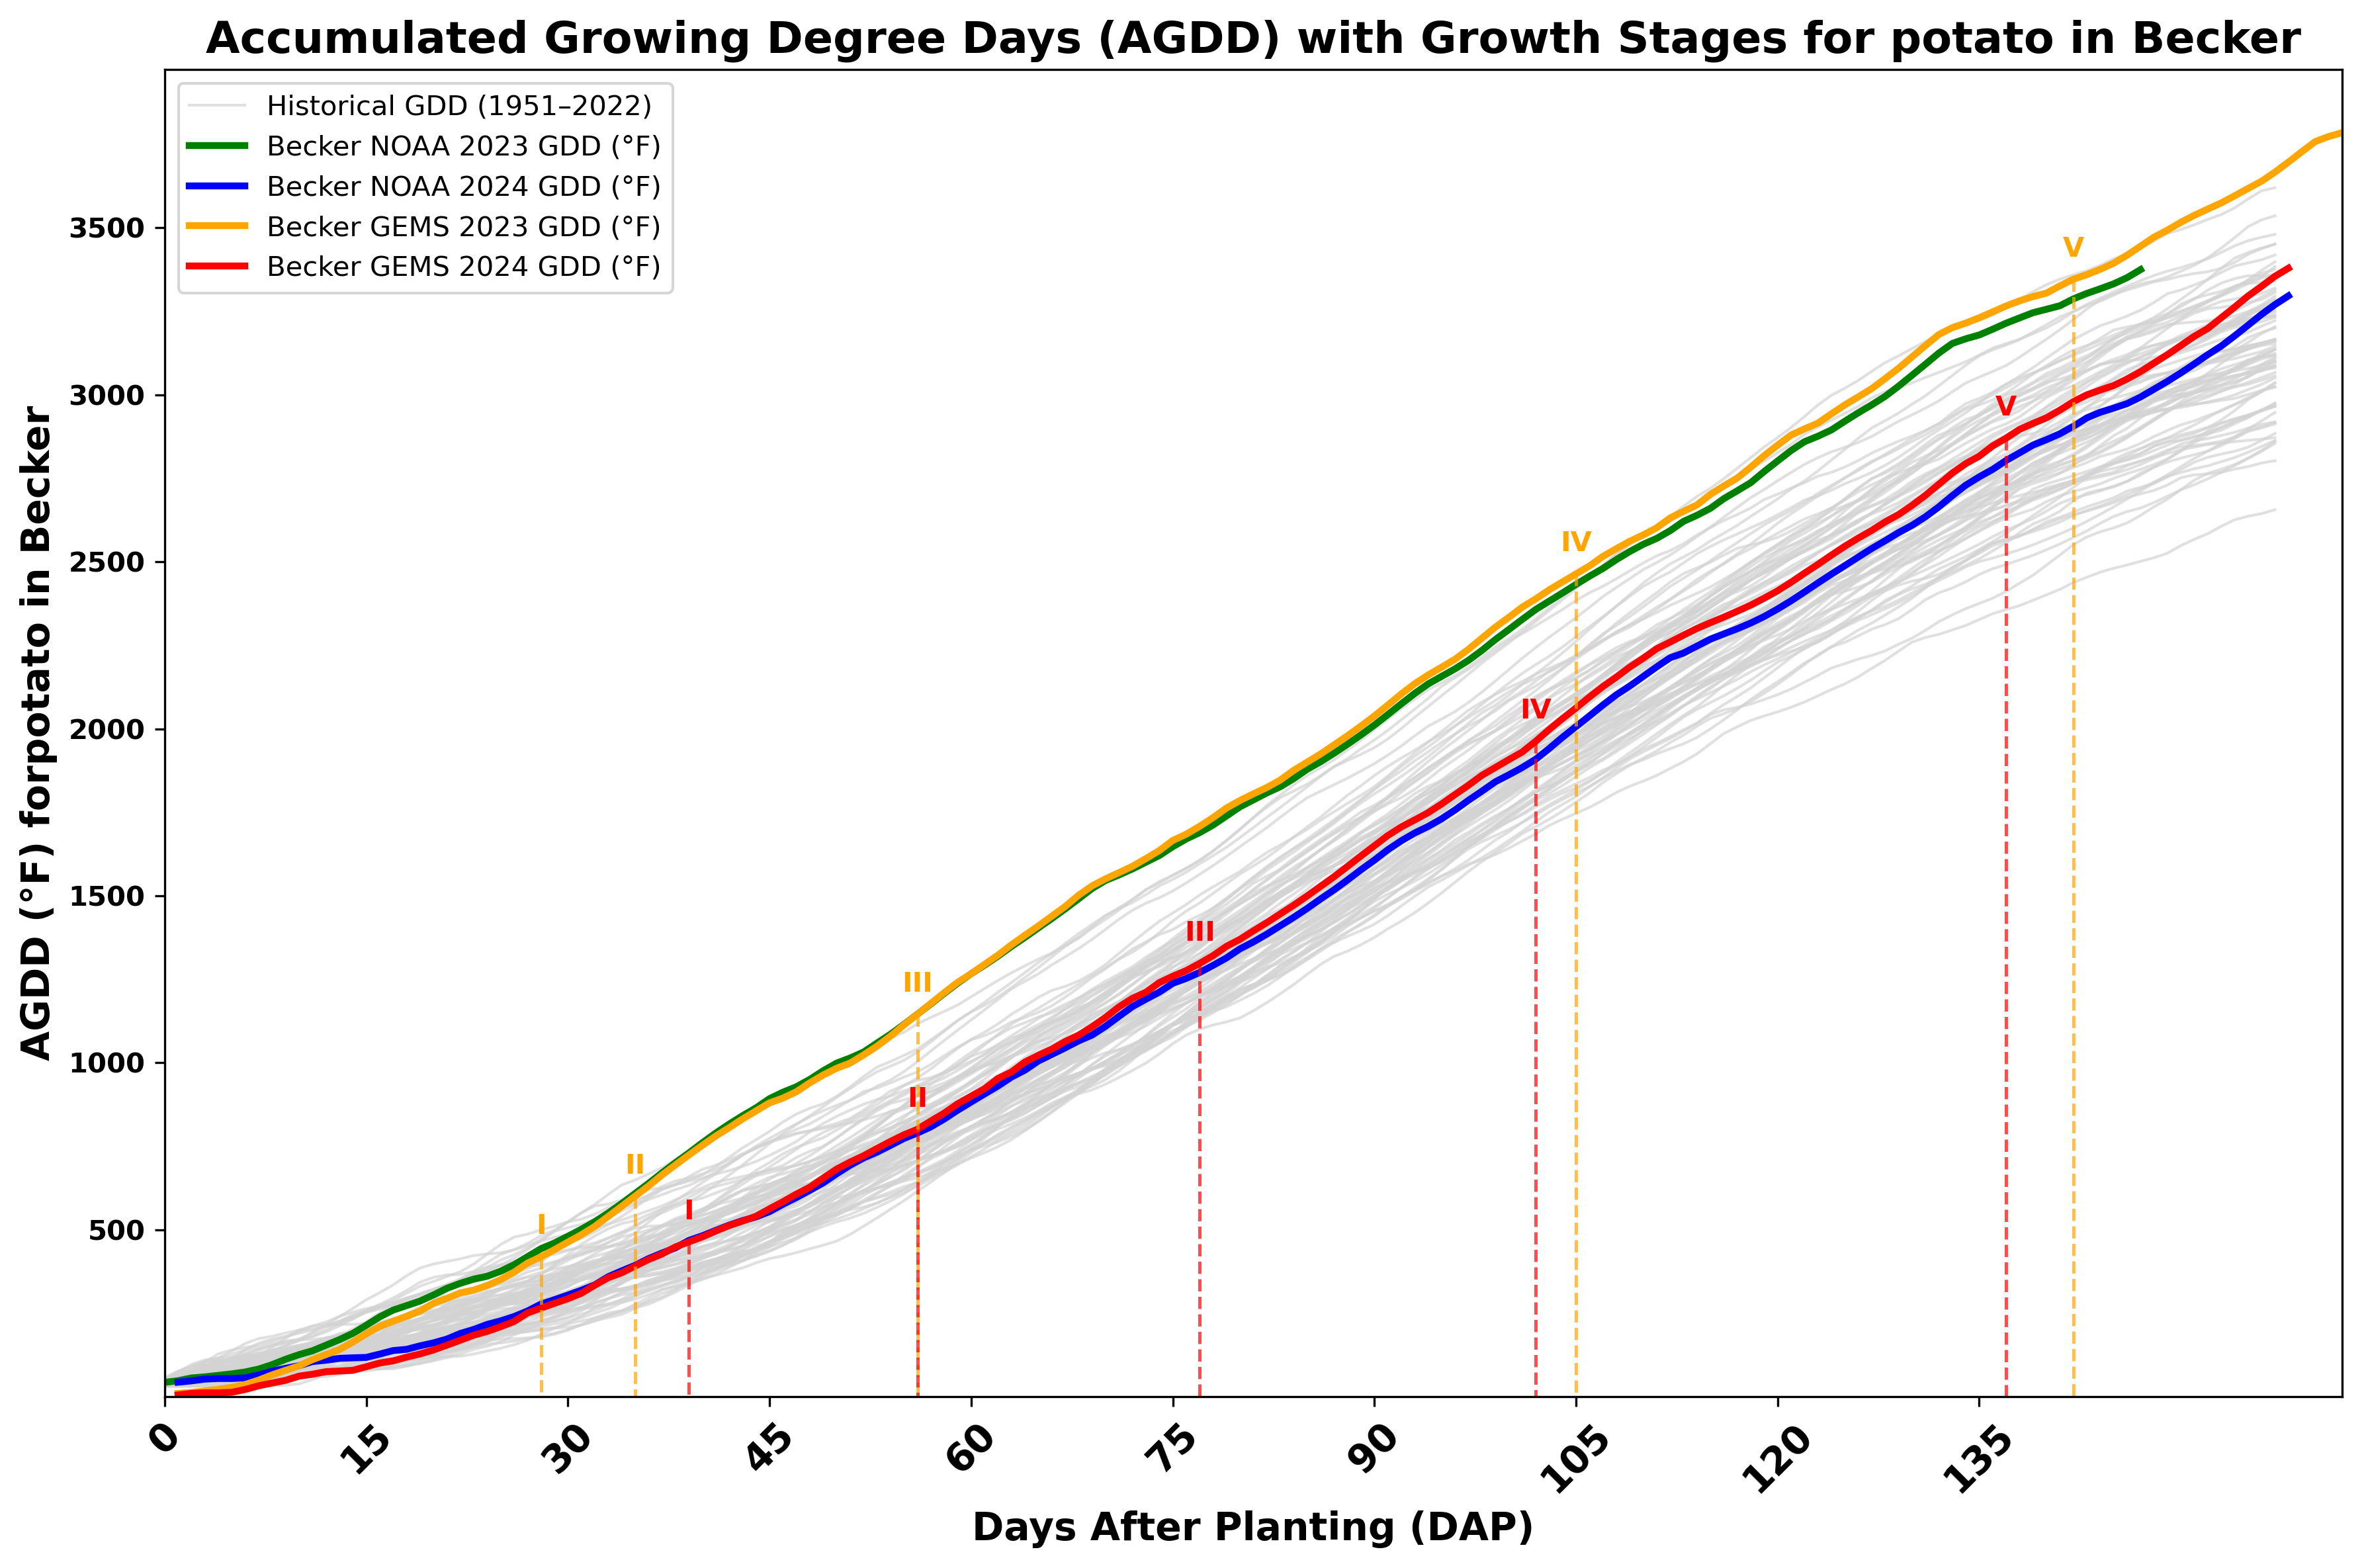

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Becker 2023 & 2024 GDD Data
file_path_2023 = "potato_gdd_BeckerGEMS2023.csv"
file_path_2024 = "potato_gdd_BeckerGEMS2024.csv"
growth_staging_2023_file = "Becker 2023 Potato growth stage GEMS.csv"
growth_staging_2024_file = "Becker 2024 Potato growth stage GEMS.csv"

becker_data_2023 = pd.read_csv(file_path_2023, parse_dates=['datetime'])
becker_data_2024 = pd.read_csv(file_path_2024, parse_dates=['datetime'])

# Define planting dates for DAP calculation
planting_date_2023 = pd.Timestamp("2023-04-26")
planting_date_2024 = pd.Timestamp("2024-04-15")

# Compute Days After Planting (DAP)
becker_data_2023['DAP'] = (becker_data_2023['datetime'] - planting_date_2023).dt.days
becker_data_2024['DAP'] = (becker_data_2024['datetime'] - planting_date_2024).dt.days

# Load Growth Staging Data for 2023 & 2024
growth_staging_2023 = pd.read_csv(growth_staging_2023_file)
growth_staging_2024 = pd.read_csv(growth_staging_2024_file)

# Clean Column Names
growth_staging_2023.rename(columns=lambda x: x.strip(), inplace=True)
growth_staging_2024.rename(columns=lambda x: x.strip(), inplace=True)

# Convert Date Column to Proper Format
growth_staging_2023['Date'] = pd.to_datetime(growth_staging_2023['Date'] + '-2023', format='%d-%b-%Y', errors='coerce')
growth_staging_2024['Date'] = pd.to_datetime(growth_staging_2024['Date'] + '-2024', format='%d-%b-%Y', errors='coerce')

# Function to Get Mode of Growth Stage Without Errors
def get_mode(series):
    mode_values = series.mode()
    return mode_values[0] if not mode_values.empty else None

# Get Mode Growth Stage for Each Date
growth_staging_mode_2023 = growth_staging_2023.groupby('Date')['Growth Stage'].agg(get_mode).reset_index()
growth_staging_mode_2024 = growth_staging_2024.groupby('Date')['Growth Stage'].agg(get_mode).reset_index()

# Merge Growth Staging Data with GDD
becker_data_2023 = pd.merge(becker_data_2023, growth_staging_mode_2023, left_on='datetime', right_on='Date', how='left')
becker_data_2024 = pd.merge(becker_data_2024, growth_staging_mode_2024, left_on='datetime', right_on='Date', how='left')

# Convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Initialize Figure
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=300)

# Plot Historical & NOAA GDD
gray_label_added = False

for year in range(1951, 2025):
    try:
        # Simulated NOAA GDD (replace with actual PotatoGDD call)
        potato_gdd_instance = PotatoGDD(data, 'time', 'tmin', 'tmax')  # Replace with actual function/data
        gdd_results = potato_gdd_instance.potato_gdd(pd.to_datetime(f"{year}-04-16").date(),
                                                     pd.to_datetime(f"{year}-09-20").date())

        gdd_results['Cumulative_GDD'] = gdd_results['Cumulative_GDD'].apply(celsius_to_fahrenheit)

        # ✅ Use correct planting date for DAP calculation
        if year == 2023:
            planting_date = planting_date_2023
        elif year == 2024:
            planting_date = planting_date_2024
        else:
            planting_date = pd.to_datetime(f"{year}-04-16")

        gdd_results['DAP'] = (gdd_results['time'] - planting_date).dt.days

        # Plotting
        if year < 2023:
            if not gray_label_added:
                ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'],
                         color='lightgray', alpha=0.7, linewidth=1, label="Historical GDD (1951–2022)")
                gray_label_added = True
            else:
                ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'],
                         color='lightgray', alpha=0.7, linewidth=1)
        elif year == 2023:
            ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'],
                     color='green', linewidth=2.5, label="Becker NOAA 2023 GDD (°F)")
        elif year == 2024:
            ax1.plot(gdd_results['DAP'], gdd_results['Cumulative_GDD'],
                     color='blue', linewidth=2.5, label="Becker NOAA 2024 GDD (°F)")
    except Exception as e:
        print(f"Error processing year {year}: {e}")
        continue

# Plot GEMS GDD Lines
ax1.plot(becker_data_2023['DAP'], becker_data_2023['Cumulative_GDD'],
         color='orange', linewidth=2.5, label="Becker GEMS 2023 GDD (°F)")
ax1.plot(becker_data_2024['DAP'], becker_data_2024['Cumulative_GDD'],
         color='red', linewidth=2.5, label="Becker GEMS 2024 GDD (°F)")

# Annotate Growth Stages – 2023
for _, row in becker_data_2023.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['Planted','I', 'II', 'III','IV','V']:
        ax1.plot([row['DAP'], row['DAP']], [row['Cumulative_GDD'], 0],
                 color='orange', linestyle='--', linewidth=1.2, alpha=0.7)
        ax1.text(row['DAP'], row['Cumulative_GDD'] + 50, row['Growth Stage'],
                 fontsize=10, ha='center', va='bottom', color='orange', fontweight='bold')

# Annotate Growth Stages – 2024
for _, row in becker_data_2024.dropna(subset=['Growth Stage']).iterrows():
    if row['Growth Stage'] in ['Planted','I', 'II', 'III','IV','V']:
        ax1.plot([row['DAP'], row['DAP']], [row['Cumulative_GDD'], 0],
                 color='red', linestyle='--', linewidth=1.2, alpha=0.7)
        ax1.text(row['DAP'], row['Cumulative_GDD'] + 50, row['Growth Stage'],
                 fontsize=10, ha='center', va='bottom', color='red', fontweight='bold')

# Axis Settings
ax1.set_xticks(range(0, 140, 15))
ax1.set_xticklabels(range(0, 140, 15), rotation=45, fontsize=14, fontweight='bold')
ax1.set_xlabel('Days After Planting (DAP)', fontsize=14, fontweight='bold')
ax1.set_ylabel('AGDD (°F) forpotato in Becker', fontsize=14, color='black', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='black')
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
ax1.set_xlim(left=0, right=max(becker_data_2023['DAP'].max(), becker_data_2024['DAP'].max(), 140))
ax1.set_ylim(bottom=1)

# Final Touches
ax1.legend(loc="upper left")
plt.title('Accumulated Growing Degree Days (AGDD) with Growth Stages for potato in Becker',
          fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig('BeckerPotato_GDD_plot.png', format='png', dpi=600, bbox_inches='tight')
plt.show()
